#**STATISTICAL PART**

Created on Monday 04 January 2021  

**Group 5 - Identification of new sources**  

@authors : C.P.M, Y.S., S.B.  

##**1/ Import of library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import files
from wordcloud import WordCloud
from pandas import DataFrame
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

##**2/ File import**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_amine = pd.read_json('liens_crawler_Amine_Arouk.json')
df_audrey = pd.read_json('liens_crawler_Audrey.json')
df_flavien = pd.read_json('liens_crawler_Flavien.json')
df_louis = pd.read_json('liens_crawler_Louis.json')
df_marianne = pd.read_json('liens_crawler_Marianne.json')
df_mika = pd.read_json('liens_crawler_Mika.json')
df_remy = pd.read_json('liens_crawler_remy_lapeyre.json')
df_sonia = pd.read_json('liens_crawler_sonia.json')
df_yacine = pd.read_json('liens_crawler_Yacine_Seba.json')
df_corentin = pd.read_json('liens_crawler_Corentin.json')
df_sibel = pd.read_json('liens_crawler_Sibel.json')

In [7]:
df = pd.concat([df_amine, df_audrey, df_flavien, df_louis, df_marianne, df_mika, df_remy, df_sonia, df_yacine, df_corentin, df_sibel] , axis=0)

In [8]:
df.columns = ['art_url']
df = df.reset_index().drop(columns=['index'])

In [9]:
site=df

In [3]:
site = pd.read_csv('/content/drive/My Drive/Liste de sites.csv')

##**3/ Some statistics on the names of sites ...**

1 - Preparation of data

In [10]:
# Step 1 : get the domain (site name) of the site thanks to the url of the article  

def site_name(url):
    site = url.split("://")
    
    if site[0] == "https" or site[0] == "http":
        name_site = site[1]
    else:
        name_site = site[0]
    
    tab = name_site.split("/")
    name_site = tab[0]
    
    
    TLD = ["fr.","www.","www2.",".org",".fr",".eu",".net",".com"]
    
    for i in TLD:
        name_site = name_site.replace(i, "")
    
    return(name_site)

In [11]:
# Step 2 : save the file in a data frame
sites = site
# del sites['URL source']
# del sites['Nom du site ']
sites['nom_site'] = [site_name(i) for i in sites['art_url']]
sites.columns = ['art_url', 'nom_site']

In [12]:
sites

,art_url,nom_site
0,http://www.compregnac12.fr/Nous-contacter.aspx,compregnac12
1,https://www.capgemini.com/fr-fr/wp-content/upl...,capgemini
2,https://medium.com/datactivist/construire-des-...,medium
3,https://prisonsystems.eu/fr/virtual-reality-2/,prisonsystems
4,https://www.plb.fr/formation/developpement/for...,plb
...,...,...
40831,https://www.mobilitesmagazine.com/post/senat-v...,mobilitesmagazine
40832,https://www.igs-ecoles.com/formation-rh/,igs-ecoles
40833,https://moocdigital.paris/cours/data-visualisa...,moocdigital.paris
40834,https://wwwnc.cdc.gov/eid/article/26/3/19-0573...,wwwnc.cdc.gov


In [13]:
# Step 3 : put all the names of the sites in a list ...

list_sites = []

for i in range (len(sites)):
  name = site_name(str(sites['art_url'][i]))
  name = name.upper() #puts in uppercase 
  name = name.replace(".", "_")
  name = name.replace(" ","_")
  name = name.replace("-","_")
  list_sites.append(name)

In [14]:
# Step 4 : ... or in a dataframe, as needed

df_sites = DataFrame(list_sites,columns=['nom_site'])

## **4/ Our results concerning the sites :**

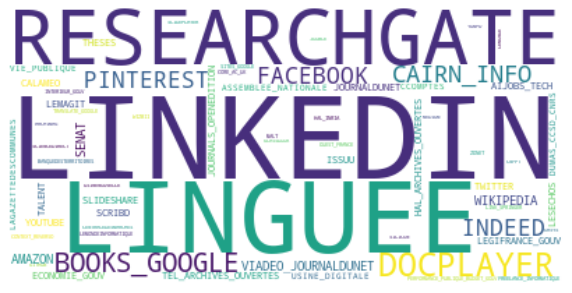

In [15]:
# Step 1 : Word cloud of the sites that appear most often 

df_site = df_sites['nom_site'].str.split(';', expand=False).tolist()
text = ';'.join([item for sublist in df_site if isinstance(sublist,list) for item in sublist])
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color="white").generate(text)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# Step 2: Count the number of hits per site
# function to count the number of appearances of a site

def countSite(df):
  return df.groupby('nom_site').count()

Text(0.5, 1.0, 'NUMBER OF APPEARANCES PER SITE')

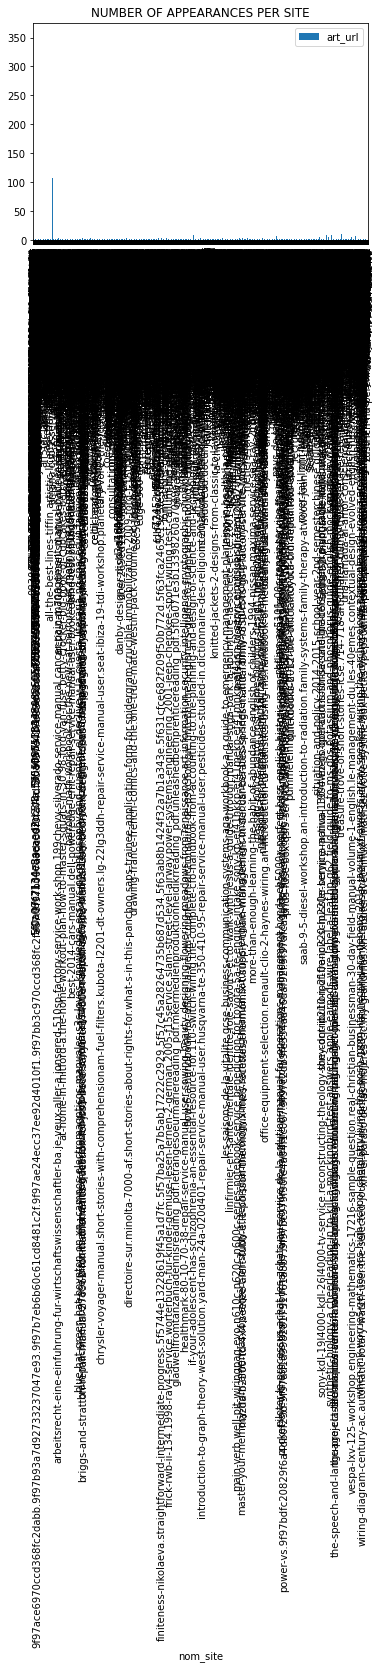

In [17]:
# Applying the function :

dataSite = countSite(sites)
dataSite.plot(kind='bar')
plt.title('NUMBER OF APPEARANCES PER SITE')

In [18]:
# Step 3 : Some basic statistics on the number of appearances

orderedDataSite = dataSite.sort_values('art_url', axis=0, ascending=False)

def stats(dataSite):
  print("On average, each site appears", dataSite.art_url.mean(),"times.")
  print("The median of appearance of the sites is of", dataSite.art_url.median())
  print("The 10 most frequent sites are as follows :")
  print(orderedDataSite.head(int(100)))

# we apply the function :

stats(orderedDataSite)

On average, each site appears 2.0191851265822787 times.
The median of appearance of the sites is of 1.0
The 10 most frequent sites are as follows :
                    art_url
nom_site                   
linkedin                358
linguee                 274
researchgate            213
docplayer               182
books.google            166
...                     ...
emploi-territorial       27
docs.microsoft           27
bpifrance                27
semanticscholar          26
defense.gouv             26

[100 rows x 1 columns]


In [19]:
[x for x in orderedDataSite.head(1000).index]

['linkedin',
 'linguee',
 'researchgate',
 'docplayer',
 'books.google',
 'cairn.info',
 'pinterest',
 'indeed',
 'facebook',
 'viadeo.journaldunet',
 'wikipedia',
 'senat',
 'amazon',
 'tel.archives-ouvertes',
 'youtube',
 'twitter',
 'slideshare',
 'calameo',
 'talent',
 'journals.openedition',
 'journaldunet',
 'issuu',
 'lemagit',
 'aijobs.tech',
 'economie.gouv',
 'theses',
 'lesechos',
 'hal.archives-ouvertes',
 'scribd',
 'legifrance.gouv',
 'assemblee-nationale',
 'lagazettedescommunes',
 'ccomptes',
 'usine-digitale',
 'dumas.ccsd.cnrs',
 'vie-publique',
 'banquedesterritoires',
 'yumpu',
 'usinenouvelle',
 'sites.google',
 'core.ac.uk',
 'cnfpt',
 'wizbii',
 'malt',
 'medium',
 'lemondeinformatique',
 'performance-publique.budget.gouv',
 'centraledesmarches',
 'orsys',
 'link.springer',
 'hal.inria',
 'sciencedirect',
 'silicon',
 'glassdoor',
 'lemonde',
 'slideplayer',
 'context.reverso',
 'translate.google',
 'freelance-informatique',
 'ouest-france',
 'archimag',
 'zdnet'

In [20]:
# Step 4: go back up the list of sites that are really related to our topic (so those that appear most often)

# 1- by putting a parameter on the x% of the most frequent ones :
def most_seen_sites_prop(dataSite,prop=5): # you can change the percentage in parameter 
  dataSite = dataSite.sort_values('art_url', axis=0, ascending = False)
  numb = int((prop/100) * len(dataSite))
  mostSeen = dataSite.head(n=numb)
  moreThanOne = dataSite[dataSite.art_url != 1]
  return mostSeen, moreThanOne

# 2- by setting a parameter on the 20 most frequent ones 

def most_seen_sites_numb(dataSite,numb=10):
  dataSite = dataSite.sort_values('art_url', axis=0, ascending=False)
  mostSeen = dataSite.head(n=numb)
  moreThanOne = dataSite[dataSite.art_url != 1]
  return mostSeen, moreThanOne

In [21]:
# the X% most frequent sites 

mostSeen, moreThanOne = most_seen_sites_prop(dataSite)

In [22]:
# # to get the list of sites and their number of appearances  

moreThanOne.to_csv('list_site_frequency.csv',index=True)

In [23]:
# if we want to read it from the code :

pd.read_csv('list_site_frequency.csv', index_col=0)

,art_url
nom_site,
linkedin,358
linguee,274
researchgate,213
docplayer,182
books.google,166
...,...
territorialchallenges,2
bilderberg,2
ultipa,2


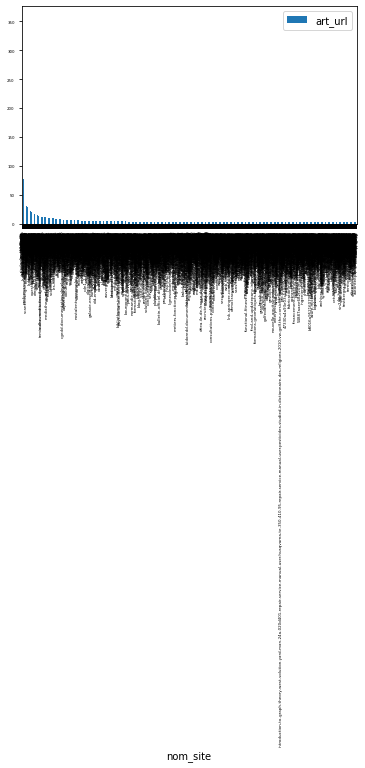

In [24]:
# Bar graph representing the number of times sites appear more than once 

moreThanOne.plot(kind="bar", fontsize=4)

In [25]:
# To have the curve function according to a percentage 

def mostFoundSites(orderedDF,percentage=8):
  listDiff=[] #liste des différences du nombre de site
  articleNumbers=orderedDF['art_url']
  for i in range (len(articleNumbers)-2):
    listDiff.append(articleNumbers[i]/articleNumbers[i+1])
  index=0
  print(listDiff)
  percentage=1+percentage/100
  while (index<len(listDiff)) and (listDiff[index]>percentage):
    print(index)
    index+=1
  mostFound=orderedDF.iloc[:index]
  return mostFound

In [26]:
mostFoundSites(dataSite,8)

[1.0, 2.0, 1.0, 1.0, 0.08333333333333333, 12.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.125, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 3.0, 0.3333333333333333, 3.0, 0.5, 2.0, 0.5, 2.0, 1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.125, 8.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.25, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0, 0.3333333333333333, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.

,art_url
nom_site,


In [27]:
# Pie chart representing the frequency of occurrence of sites 

def pie_chart_site(dataSite,moreThanOne):
  new_row={'nom_site':'uniques sites','art_url':len(dataSite)-len(moreThanOne)}
  all_sites=moreThanOne.copy()
  all_sites.loc['uniques sites']=new_row
  plot = all_sites.plot.pie(y='art_url', figsize=(5, 5))
  return all_sites

# RESTE A INTEGRER

In [60]:
# function that retrieves the url of the site thanks to the url of the article article

def lienRacine(lienArticle) :
  split = lienArticle.split('/')
  return (split[0]+'//'+split[2])

def splitPath(lien) :
  listePath = lien.split('/')[3:]
  for mot in range(len(listePath)) :
    if listePath[mot] =='' :
      listePath.remove('')
  return listePath

In [61]:
site

,art_url,nom_site
0,http://www.compregnac12.fr/Nous-contacter.aspx,compregnac12
1,https://www.capgemini.com/fr-fr/wp-content/upl...,capgemini
2,https://medium.com/datactivist/construire-des-...,medium
3,https://prisonsystems.eu/fr/virtual-reality-2/,prisonsystems
4,https://www.plb.fr/formation/developpement/for...,plb
...,...,...
33422,https://www.jhipster.tech/jhipster-registry/,jhipster.tech
33423,https://bmi.ku.dk/english/about_department/adm...,bmi.ku.dk
33424,https://www.ficonsulting.com/knowledge-graphs-...,ficonsulting
33425,https://arxiv.org/pdf/2008.00549,arxiv


In [62]:
# function that makes breakdowns according to several indicators

def analyseGroupe(data,number=20) :
  data2 = data.copy()
  data['site_name']  =[site_name(i) for i in data['art_url']]
  data['site_url'] = [lienRacine(i) for i in data['art_url']]
  data['Chemins split'] = [splitPath(i) for i in data['art_url']]
  data['group'] = np.zeros(data.shape[0])
  data['sous_groupe'] = np.zeros(data.shape[0])

  for words in range(data['Chemins split'].shape[0]):
    if len(data['Chemins split'].iloc[words])>1 :
      data['group'].iloc[words] = data['Chemins split'].iloc[words][0]
      data['sous_groupe'].iloc[words] = data['Chemins split'].iloc[words][0] +' '+data['Chemins split'].iloc[words][1]
    if len(data['Chemins split'].iloc[words])==1 :
      data['group'].iloc[words] = data['Chemins split'].iloc[words][0]
      data['sous_groupe'].iloc[words] = np.nan

    if len(data['Chemins split'].iloc[words])==0 :
      data['group'].iloc[words] = np.nan
      data['sous_groupe'].iloc[words] = np.nan

  plt.title('Groupes Counts')
  data.groupby(['site_name','group'])['group'].count().sort_values(ascending=False).iloc[:number].plot(kind='bar',figsize=(16,6))
  plt.show()


  plt.title('Groupes Cammembert')
  fig = plt.gcf()
  fig.set_size_inches(10,10)
  plt.pie( data.groupby(['nom_site','group'])['group'].count().sort_values(ascending=False).iloc[:number],  autopct='%1.1f%%', labels = data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False).iloc[:number].index )
  plt.show()



  plt.title('Sous_groupes Counts')
  data.groupby(['site_name','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number].plot(kind='bar',figsize=(16,6))
  plt.show()
  plt.title('Sous_groupes Cammembert')
  fig = plt.gcf()
  fig.set_size_inches(10,10)
  plt.pie( data.groupby(['site_name','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number], autopct='%1.1f%%', labels = data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number].index)
  plt.show()
 
  #print(data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False))
  
  #data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().plot(kind='bar',figsize=(16,6))
  #plt.show()
  #data.groupby(['nom_site','groupe'])['groupe'].count().plot(kind='bar',figsize=(16,6))
  #plt.show()
  
  return data,data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False).iloc[:number],data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number]

analyseGroupe(site,15)
a=1

IndexError: list index out of range

In [63]:
analyseGroupe(site,20)

IndexError: list index out of range